In [186]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from wordcloud import WordCloud, STOPWORDS
from PIL import *
import string
import re
import nltk                                        
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer      
import jieba

In [57]:
path = "C:/Users/ericluo04/Documents/GitHub/Bots-Project/Code/"

In [58]:
master = pd.read_csv('master_new.csv')

### Languages

Text(0.5, 1.0, 'Number of Languages')

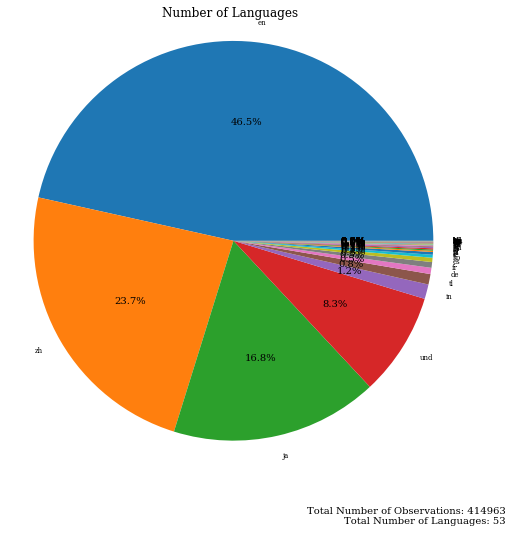

In [5]:
master.language.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.axis('equal')
plt.ylabel('')
plt.figtext(0.99, 0.01, 'Total Number of Observations: ' + str(len(master)) + \
            '\nTotal Number of Languages: ' + str(master['language'].nunique()), \
            horizontalalignment='right')
plt.title('Number of Languages')

Text(0.5, 1.0, 'Number of Languages')

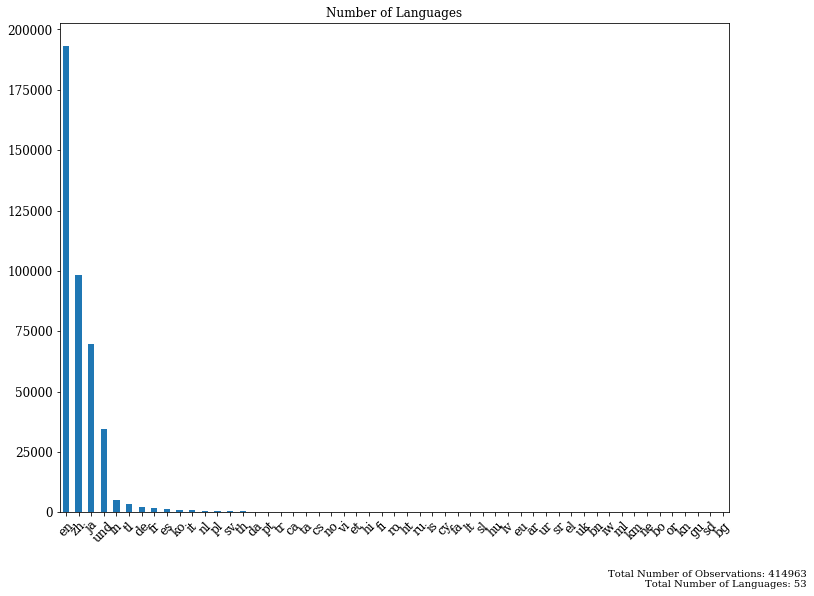

In [6]:
master.language.value_counts().plot(kind='bar', figsize=(12, 9), fontsize=12, rot=45)
plt.figtext(0.99, 0.01, 'Total Number of Observations: ' + str(len(master)) + \
            '\nTotal Number of Languages: ' + str(master['language'].nunique()), \
            horizontalalignment='right')
plt.title('Number of Languages')

### Time

In [7]:
master.index = pd.to_datetime(master['created_at'])

Text(0.5, 1.0, 'Time Frequency')

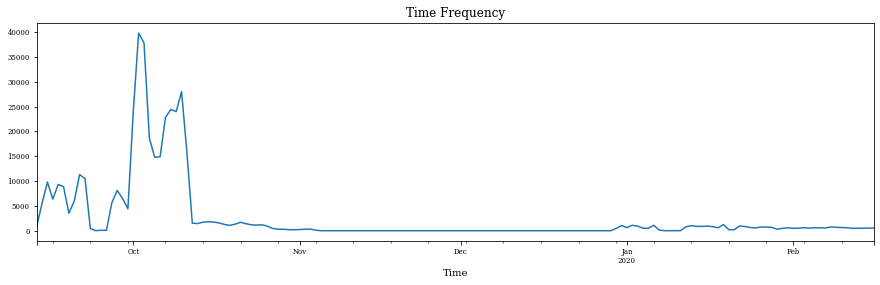

In [8]:
master['created_at'].resample("1d").count().plot(figsize=(15,4))
plt.xlabel('Time')
plt.title('Time Frequency')

### Followers, Friends, # Tweets

Text(0.5, 1.0, 'Number of Followers')

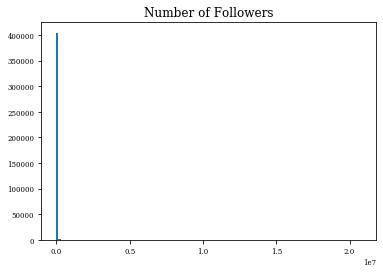

In [9]:
master.hist(column='n_followers', grid=False, bins=200)
plt.title("Number of Followers")

Text(0.5, 1.0, 'Number of Friends')

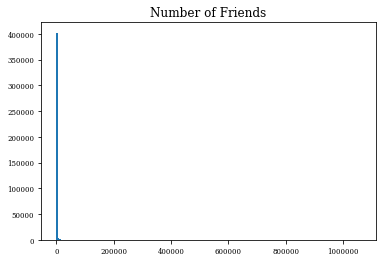

In [10]:
master.hist(column='n_friends', grid=False, bins=200)
plt.title("Number of Friends")

Text(0.5, 1.0, 'Number of Tweets per User')

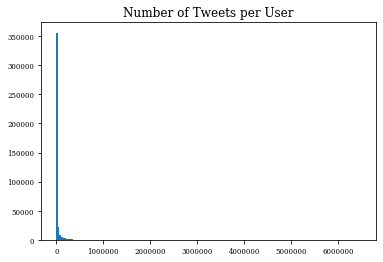

In [11]:
master.hist(column='n_tweets_user', grid=False, bins=200)
plt.title("Number of Tweets per User")

### Polarities

Text(0.5, 1.0, 'Convolutional Neural Network Polarities')

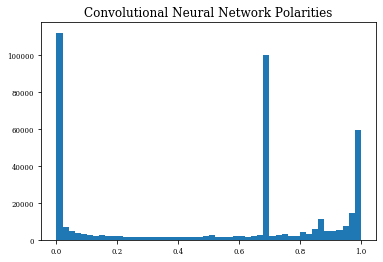

In [12]:
master.hist(column='CNNpolarity', grid=False, bins=50)
plt.title("Convolutional Neural Network Polarities")

Text(0.5, 1.0, 'Naive Bayes Polarities')

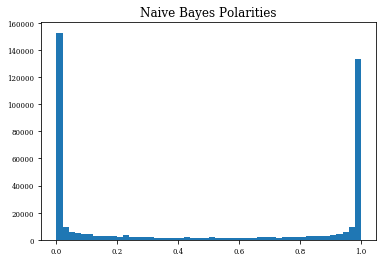

In [13]:
master.hist(column='NBpolarity', grid=False, bins=50)
plt.title("Naive Bayes Polarities")

In [14]:
corr, _ = spearmanr(master['CNNpolarity'], master['NBpolarity'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.654


### Word Clouds

In [146]:
def html_decode(s):
    """
    Returns the ASCII decoded version of the given HTML string. This does
    NOT remove normal HTML tags like <p>.
    """
    htmlCodes = (
            ("'", '&#39;'),
            ('"', '&quot;'),
            ('>', '&gt;'),
            ('<', '&lt;'),
            ('&', '&amp;'),
            ("'", '^'),
            (" ", '\n'),
    )
    
    for code in htmlCodes:
        s = s.replace(code[1], code[0])
    
    return s

In [147]:
stops = stopwords.words('english')
for i in ['hong', 'kong', 'hongkong', 'thi', 'rt', 'thank', 'hk', 'hongkongprotest', 'hkprotest', '香', '港', 'http', 'co']:
    stops.append(i)

In [176]:
# display foreign languages (e.g. mandarin, japanese)
master['tweet_wc'] = [x.encode().decode('unicode-escape', 'ignore') for x in master['tweet']]

# lowercase and clean html
master['tweet_wc'] = [html_decode(x.lower()) for x in master['tweet_wc']]
# remove punctuation
master['tweet_wc'] = master['tweet_wc'].str.replace('[!"#\$%&\'\(\)\*\+,\-\.\/:;<=>\?@\^_`{\|}~]', '')
# remove numbers
#master['tweet_wc'] = master['tweet_wc'].str.replace('[\d-]','')
# stemming
snow = nltk.stem.SnowballStemmer('english')
master['tweet_wc'] = master['tweet_wc'].apply(lambda x: ' '.join([snow.stem(word) for word in x.split() if word not in (stops)]))

C:\Users\ericluo04\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: invalid escape sequence '\ '
  


In [190]:
# modeled from https://github.com/nikhilkumarsingh/wordcloud-example/blob/master/mywc.py
def create_wordcloud(text):
    # create numpy araay for wordcloud mask image
    mask = np.array(Image.open(path + "2. HK Training/polarities/cloud.png"))

    # create wordcloud object
    wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stops).generate(str(text))
    
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

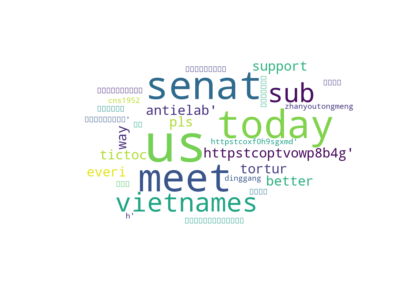

In [191]:
create_wordcloud((master[master['CNNpolarity'] <= .5]['tweet_wc']).values)

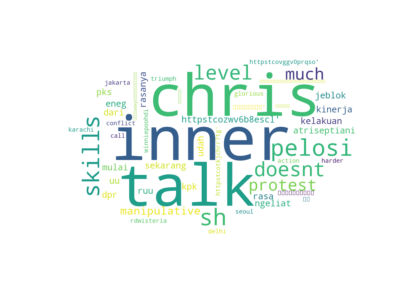

In [192]:
create_wordcloud((master[master['CNNpolarity'] >= .5]['tweet_wc']).values)

In [193]:
#create_wordcloud((master[(master['CNNpolarity'] >= .3) & (master['CNNpolarity'] <= .7)]['tweet_wc']).values)